<a href="https://colab.research.google.com/github/ayushNautiyal35/ML_basic_to_advanced/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Classification**

We will be using MNIST dataset which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labelled with image it represents.

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The sklearn.datasets package contains mostly three types of functions: fetch functions such as fetch_openml() to download real-life datasets,load_* functionsto load small toy datasets bundled with Scikit-Learn and make_* functions to generate fake datasets for test set.

But the Mnist dataset contains images and dataframes that are not ideal for that so its preferrable to set as_frame=False to get the data as Numpy arrays

In [2]:
x,y=mnist.data,mnist.target
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
x.shape

(70000, 784)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
y.shape

(70000,)

There are 70,000 images and each image has 784 features. This is beacause each image is 28x28 pixels and each feature simply represnts one pixel's intensity,from 0 to 255.

All we need to do is grab an instance's feature vector, reshape it to 28x28 array and display it using Matplotlib's imshow() function. We use cmap="binary" to get a grayscale color map where 0 is white and 255 is black.

In [6]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image,cmap="binary")
  plt.axis("off")


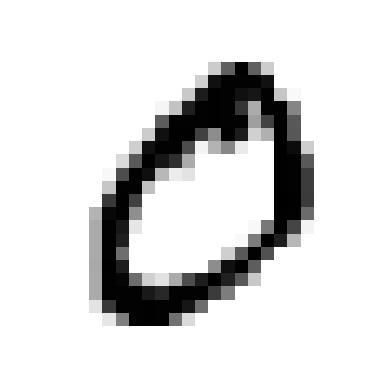

In [7]:
some_digit=x[1]
plot_digit(some_digit)
plt.show()

In [8]:
y[1]

'0'

The Mnist dataset returned by fetch_openml() is actually already split into a training set(the first 60,000) and test set(the last 10,000)

In [9]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [10]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Training a Binary Classifier

Lets simplify the proble for now and try to identify one digit-for example the number 5. This 5 detector will be an example of binary classifier, capable of distinguising between just two classes 5 and non 5.

In [11]:
y_train_0=(y_train=='0')
y_test_0=(y_test=='0')

Now pick up ac lassier a good choice is stochastic gradient descent(SGD) classifier,using SGDClassifier class in scikit learn.This classifier is capable of handling very large datasetsefficiently. This is in part because SGD deals with training instances independently, one at a time, which also makes SGD well suited for online learning.

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_0)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

##Performance Measures

#Measuring accuracy usng Cross-Validation

 Let's use cross_val_score fuction to evaluate our SgdClassifier

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(sgd_clf,x_train,y_train_0,cv=3,scoring="accuracy")

array([0.9854, 0.9847, 0.9865])

its 98% now now look for non 0 with DummyClassifier

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
dummy_clf=DummyClassifier()
dummy_clf.fit(x_train,y_train_0)
print(any(dummy_clf.predict(x_train))) #prints False : no 0s detects

False


In [18]:
cross_val_score(dummy_clf,x_train,y_train_0,cv=3,scoring="accuracy")

array([0.9013 , 0.9013 , 0.90125])

It means if we guess not 0 it is 90%. This demonstrates why accuracy is generally not the preferred performance measure for classifiers,especially when we are dealing with skewed datasets(when some classes are more frequent than others).  

#Confusion Matrices

The general idea of a confusion matrix is to count the number of times instances of class A are classified as class B,for all A/B pairs. For ex, to know the number of times the classifier confused images of 8s with 0s, we would look at row #8, column #0 of the confusion matrix.

To compute confusion matrix we first need to have a set of predictions so that they can be compared to actual targets.We can make prediction on test set but it is safe to be untouched so we can use cross_val_predict

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_0,cv=3)

Just like cross_val_score it also performs k-fold cross-validation but instead of returning the evaluation scores it returns the prediction made on each test fold.

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_0,y_train_pred)
cm

array([[53486,   591],
       [  277,  5646]])

TN | FP

FN | TP

Each row in a confusion matrix represents an actual class while each column type represents a predicted class.

The confusion matrix gives you a lot of information but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions this is called the precision of the classifier.

precision=  TP/(TP+FP)



 A trivial wa to have perfectprecisions is to create a classifier that always make negative predictions,except for one single positive prediction on the instance its most confident about. If this one prediction is correct then the classifier has 100% precision(1/1).  

Obviously such a classifier would not be very useful since it would ignore all but one positive instace. So the precision is typically used along with another metric named recall also called sensitivity or true positive rate.

recall= Tp /(TP+FN)

In [21]:
from sklearn.metrics import precision_score,recall_score

In [22]:
precision_score(y_train_0,y_train_pred)

0.9052429052429053

In [23]:
recall_score(y_train_0,y_train_pred)

0.9532331588721932

If we talk about accuracy means when it claims its 0 it is coreect 90% times moreover it detects 95% 0s.

It is often convenient to combine precision and recall into a single metric called the F1 score, especially when we need a single metric to compare two classifiers. The F1 score is the harmonic mean of precisions and recall.Whereas the regular mean treats all values equally,the harmonic men gives much more weight to low values.

F1= 2xprecisionxrecall / precision+recall

  = TP/(TP+(FN+FP)/2)

In [24]:
from sklearn.metrics import f1_score

In [25]:
f1_score(y_train_0,y_train_pred)

0.9286184210526315

The F1 score favors classifiers that have similar precision and recall.This is not the case every time.

#The Precision/Recall Trade-off

Lets look at how the SGDClassifier makes its classification decisions.For each instance it computes a score basedon decision function.If that score is greater than a threshold it assigns the instance to the positive class otherwise it assigns it to the negative class.

Scikit learns does not let you set the threshold value directly but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier predict() method you can call its decision_function() method, which returns a score for each instance, and then use any threshold you want to make predictions based on these scores.

In [26]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([21180.55082734])

In [27]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

Now lets raise threshold value

In [28]:
threshold=100000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decrease recall.

How do we decide which threshold to use?

First use the cross_val_predict() function to get the scores of all the instance in the training set,but this time specify that you want to return decision scores instead of predictions.

In [29]:
y_scores=cross_val_predict(sgd_clf,x_train,y_train_0,cv=3,method='decision_function')

In [30]:
y_scores

array([-24790.155884  ,  31562.50035756, -23872.95718613, ...,
       -28606.46843279, -19778.55970938, -11683.52453461])

Wth  these scores use precision_recall_curve() function to compute precision and recall for all possible thresholds.

In [31]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_0,y_scores)

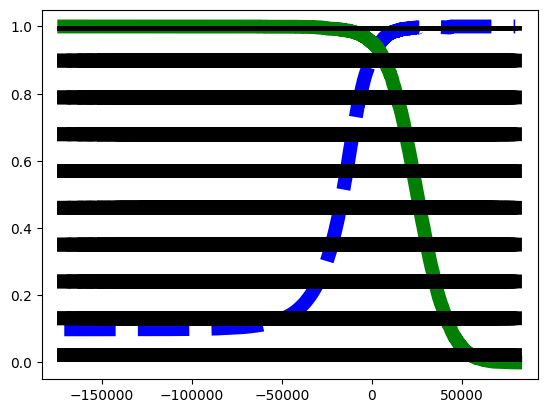

In [32]:
import matplotlib.pyplot as plt
plt.plot(thresholds,precisions[:-1],"b--",label="Precision",linewidth=10)
plt.plot(thresholds,recalls[:-1],"g-",label="Recall",linewidth=10)
plt.vlines(thresholds,0,1.0,"k","dotted",label="Threshold",linewidth=10)
plt.show()


Another way to select a good precision/recall tradeoff is to plot precision directly against recall

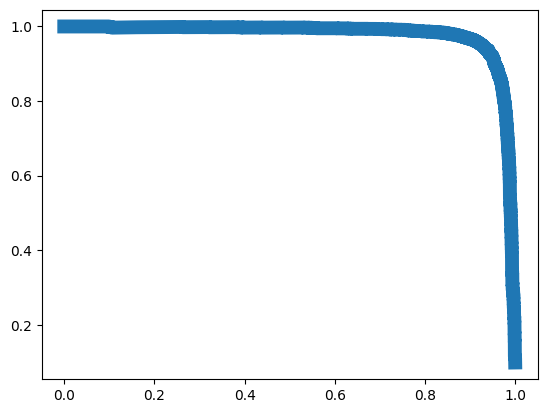

In [33]:
plt.plot(recalls,precisions,linewidth=10,label="Precision/Recall curve")
plt.show()

Suppose you ecide to aim for 90%precision then we can use Numpy Array argmax() which return first index of maximum value.

In [34]:
idx_for_80_precision=(precisions>=0.80).argmax()
threshold_for_80_precision= thresholds[idx_for_80_precision]
threshold_for_80_precision

-6074.775172949752

In [35]:
y_train_pred_80=(y_scores>=threshold_for_80_precision)
precision_score(y_train_0,y_train_pred_80)

0.8

In [36]:
recall_at_80_precision=recall_score(y_train_0,y_train_pred_80)
recall_at_80_precision

0.9758568293094716

This is showing high recall but this will not all time case.

# ROC curve

The receiver operating characteristic(ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recal the ROC curve plots the true positive rate(recall) against false positive rate(FPR). FPR also call fallout is ratio of negative instances that are correctly classsified as negative.It is equal to 1-true negative rate(TNR). TNR is known as specificity.Hence ROC curve plots sensitivity vs 1-specificity.

In [37]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_0,y_scores)

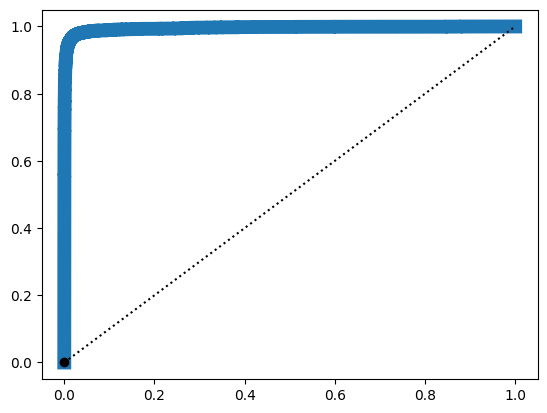

In [38]:
idx_for_threshold_at_80=(threshold<=threshold_for_80_precision).argmax()
tpr_80,fpr_80=tpr[idx_for_threshold_at_80],fpr[idx_for_threshold_at_80]

plt.plot(fpr,tpr,linewidth=10,label="ROC curve")
plt.plot([0,1],[0,1],'k:',label="Random Classifier ROC curve")
plt.plot([fpr_80],[tpr_80],'ko',label="ROC curve")
plt.show()

Once again ther is trade off the higher the recall(TPR) the more false positive(FPR) the classifier produces.The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible.

One way to compare classifiers is to measure the area under the curve(AUC). A perfect classifier will have a ROC AUC equal to 1, whereas apurely random classifier will have a ROC AUC equal to 0.5.

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0,y_scores)


0.9951089652363219

Lets now create a RandomForestClassifier whose PR curve and F1 score we can compare to those of SGDClassifier.

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

The precision_recall_curve() function expects labels and scores for each instance, so we need to train the random forest classifier and make it assign a score to each instance.But RandomForestClassifier class does not have a decision_function() method,due to the way it works.
Luckily it has predict_proba() ,ethod that returns class probabilities for each instance and we can just use the probability of the positive class as a score,so it will work fine.

In [41]:
y_probas_forest=cross_val_predict(forest_clf,x_train,y_train_0,cv=3,method="predict_proba")

In [42]:
y_probas_forest[:2]

array([[1., 0.],
       [0., 1.]])

The second column contains the estimated probabilites for the positive class so lets pass them to precision_recall

In [43]:
y_scores_forest=y_probas_forest[:,1]
precision_forest,recalls_forest,thresholds_forest=precision_recall_curve(y_train_0,y_scores_forest)

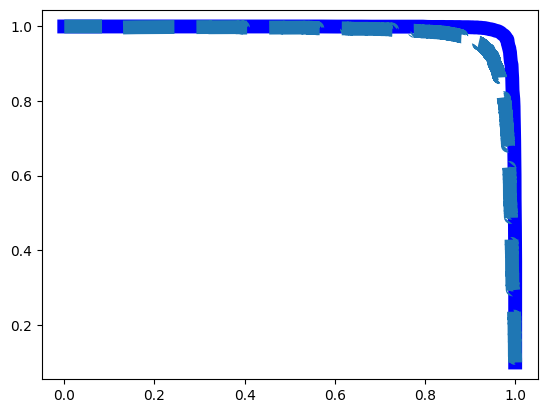

In [44]:
plt.plot(recalls_forest,precision_forest,"b-",linewidth=10,label="Random fOrest")
plt.plot(recalls,precisions,"--",linewidth=10,label="SGD")
plt.show()

In [45]:
y_train_pred_forest=y_probas_forest[:,1]>=0.5
f1_score(y_train_0,y_train_pred_forest)

0.9697126585555268

In [46]:
roc_auc_score(y_train_0,y_scores_forest)

0.9994553136100529

The random classifer f1 score and ROC AUC score are significantly better than SGDClassifier

#Multiclass Classification

Some scikit-Learn Classifiers (eg logisticregression,randomforestclassifier and gaussianNB) are cabale of handling multiple classes natively.UOthers are strictly binary classifier(SGDClassifer and SVC). However there are various strategies that you can use to perform multiclass classification with multiple binary classifiers.

One way to create a system that can classify the digit images into 10 classes(from 0 to 9)one for each digit. Then we want to classify and we get decision score and select highest score. This is called one-versus-all(OVA).

Another strategy is to train a binary classifier for every pair of digits: one to distin
guish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers.  The main advan
tage of OvO is that each classifier only needs to be trained on the part of the training
set for the two classes that it must distinguish

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the
size of the training set, so for these algorithms OvO is preferred since it is faster to
train many classifiers on small training sets than training few classifiers on large
training sets. For most binary classification algorithms, however, OvA is preferred.

Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐
class classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO). Let’s try this with the SGDClassifier:

In [47]:
from sklearn.svm import SVC
svm_clf=SVC(random_state=42)
svm_clf.fit(x_train[:2000],y_train[:2000])

SVC(random_state=42)

We trained SVC using the original target classes fom 0 to 9 instead of the 5-versus-the-rest target classes since there are 10 classes. Sciit-Learn used the OVO statregy and trained 45 binary classifiers.

In [48]:
svm_clf.predict([some_digit])

array(['0'], dtype=object)

This code actually make 45 prediction one per pair of classes and it selects the class that won the most duels. If we call the decision_function() then we will get 10 scores and we have to selct the most highest score

In [49]:
some_digit_score=svm_clf.decision_function([some_digit])
some_digit_score.round(2)

array([[ 9.31, -0.29,  6.14,  7.21,  0.71,  8.28,  3.8 ,  1.77,  2.77,
         5.11]])

In [50]:
class_id=some_digit_score.argmax()
class_id

0

When a classifier is trained, it stores the list of target classes in its
classes_ attribute, ordered by value. In this case, the index of each
class in the classes_ array conveniently matches the class itself
(e.g., the class at index 5 happens to be class 5), but in general you
won’t be so lucky: you will need to look up the class labels like this:



In [51]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance
and pass a binary classifier to its constructor.

In [52]:
from sklearn.multiclass import OneVsRestClassifier
over_clf = OneVsRestClassifier(SVC(random_state=42))
over_clf.fit(x_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

Let's make a prediction and check the nuber of trained classifiers.

In [56]:
over_clf.predict([some_digit])

array(['0'], dtype='<U1')

In [57]:
len(over_clf.estimators_)

10

Trianing ans SGDClassifier

In [59]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array(['0'], dtype='<U1')

In [62]:
sgd_clf.decision_function([some_digit]).round()

array([[ 14391., -36919.,  -9811.,  -8055., -21825., -11314., -23649.,
        -15987.,  -3799., -10635.]])

In [63]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

If you used a random classifier, you would get 10%
accuracy, so this is not such a bad score, but you can still do much better by simply scaling the inputs.

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype("float64"))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

#Error Analysis

A colored diagram of the confusion matrix is much easier to analyze. To plot such a diagram, use the ConfusionMatrixDisplay.from_predictions()

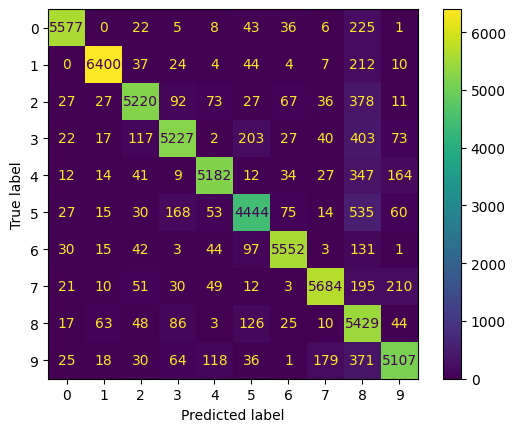

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

Its important to normalize the confusion matrix by dividing each value by the total number of images in the corresponding class. This can be done simply by setting normalize="true".

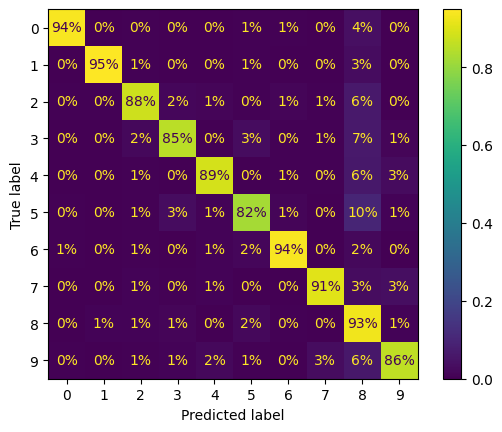

In [67]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="true",values_format=".0%")
plt.show()

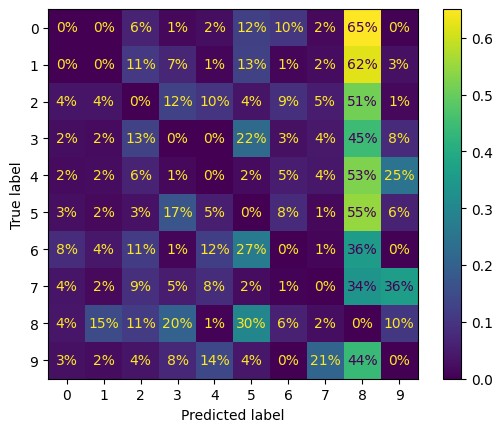

In [68]:
sample_weight=(y_train_pred!=y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize="true",values_format=".0%")
plt.show()

It is also possible to normalize the confusion matrix by column rather than by row: if you set normalize="pred".
Analyzing the confusion matrix often gives you insights into ways to improve your classifier. Looking at these plots, it seems that your efforts should be spent on reducing the false 8s.

Analyzing individualm errors can also be a good way to gain insights into what your classifer is doing and why it is failing.


In [84]:
import numpy as np
import matplotlib.pyplot
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]

    ########
    if images_per_row == 0:
       images_per_row = 0.1
    else:
        images_per_row = images_per_row
        pass
    ########

    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

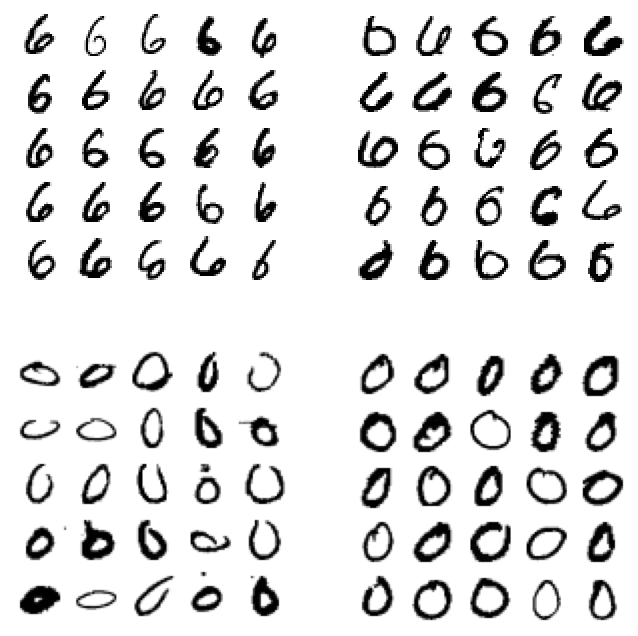

In [85]:

cl_a,cl_b='6','0'
X_aa=x_train[(y_train==cl_a)& (y_train_pred ==cl_a)]
X_ab=x_train[(y_train==cl_a)& (y_train_pred==cl_b)]
X_ba=x_train[(y_train==cl_b)& (y_train_pred==cl_a)]
X_bb=x_train[(y_train==cl_b)& (y_train_pred==cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()




#Multilabel classification

A classsification system that outputs multiple binary tags is called multilabel classification system.

In [88]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train >= '7')
y_train_odd=(y_train.astype('int8')%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier()

This code creates a y_multilabel array containing two target labels for each digit
image: the first indicates whether or not the digit is large (7, 8, or 9) and the second
indicates whether or not it is odd. The next lines create a KNeighborsClassifier
instance (which supports multilabel classification, but not all classifiers do) and we
train it using the multiple targets array

In [89]:
knn_clf.predict([some_digit])

array([[False, False]])

And it gets it right as the digit 0 is not large not odd.

There are many ways to evaluate a multilabel classifier, and selecting the right metric
really depends on your project. For example, one approach is to measure the F1
 score
for each individual label (or any other binary classifier metric discussed earlier), then
simply compute the average score

In [90]:
y_train_knn_pred=cross_val_predict(knn_clf,x_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.976410265560605

This assumes that all labels are equally important, which may not be the case. In par‐
ticular, if you have many more pictures of Alice than of Bob or Charlie, you may want
to give more weight to the classifier’s score on pictures of Alice. One simple option is
to give each label a weight equal to its support (i.e., the number of instances with that
target label). To do this, simply set average="weighted" in the preceding code.

IF you wish to use a classifer that does not natively support multilabel classification,such asSVC,one possible strategy is to train one model per label.However this strategy may have a hard time capturing the dependencies between the labels.To solve this issue,the models can be organized in a chain:when a model makes aprediction, it uses the input features plus all the predictions of the models that come before it in the chain.

The good news is that Scikit-Learn has a class called ChainClassifier that does just that. By default it use the true labels for training,feeding each model the appropiate labels depending on their position in the chain. But if you set the cv hyperparameters,it will use cross-validation to get clean predictions from each trained model for ever instance in the training set,and these predictions will then be used to train all models in the chain.

In [91]:
from sklearn.multioutput import ClassifierChain
chain_clf=ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf.fit(x_train[:2000],y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [93]:
chain_clf.predict([some_digit])

array([[0., 0.]])

#Multioutput Classification

It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have
more than two possible values).


To illustrate this, let’s build a system that removes noise from images. It will take as
input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images

Let’s start by creating the training and test sets by taking the MNIST images and
adding noise to their pixel intensities using NumPy’s randint() function.

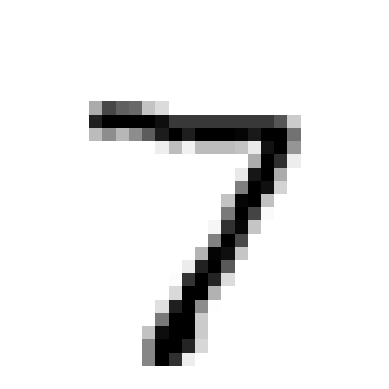

In [97]:
np.random.seed(42)
noise=np.random.randint(0,100,(len(x_train),784))
x_train_mod=x_train+noise
noise=np.random.randint(0,100,(len(x_test),784))
x_test_mod=x_test+noise
y_train_mod=x_train
y_test_mod=x_test
plot_digit(x_test[0])
plt.show()

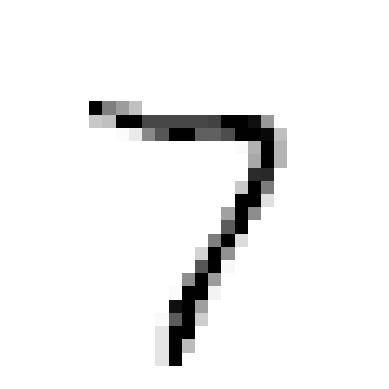

In [96]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train_mod,y_train_mod)
clean_digit=knn_clf.predict([x_test_mod[0]])
plot_digit(clean_digit)
plt.show()